In [1]:
import unsupervised_learning
import pandas as pd

In [2]:
query = "SELECT * FROM nba_player"

In [3]:
df = unsupervised_learning.fetch_data_from_db(query)

Attempt 1 of 3 to connect to the database...
❌ Connection attempt 1 failed: (pyodbc.OperationalError) ('08001', '[08001] [Microsoft][ODBC Driver 18 for SQL Server]TCP Provider: Timeout error [258].  (258) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Invalid connection string attribute (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Unable to complete login process due to delay in login response (258)')
(Background on this error at: https://sqlalche.me/e/20/e3q8)
Retrying in 3 seconds...
Attempt 2 of 3 to connect to the database...
❌ Connection attempt 2 failed: (pyodbc.OperationalError) ('08001', '[08001] [Microsoft][ODBC Driver 18 for SQL Server]TCP Provider: Timeout error [258].  (258) (SQLDriverConnect); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Login timeout expired (0); [08001] [Microsoft][ODBC Driver 18 for SQL Server]Invalid connection string attribute (0); [08001

In [4]:
df

,ID,Player,Until,G,GS,All_Star,MP,FG,FGA,2P,...,eFG%,Pos,Team,MVP,ROY,DPOY,All_NBA,Champ,IG,Wiki
0,1,Precious Achiuwa,2024-25,285,63,0,5641,870,1801,754,...,0.515,F,"MIA,NYK,TOR",0,0,0,0,0,192992.0,278548.0
1,2,Steven Adams,2024-25,734,641,0,19249,2744,4671,2743,...,0.588,C,"HOU,MEM,NOP,OKC",0,0,0,0,0,587129.0,512197.0
2,3,Bam Adebayo,2024-25,529,425,3,16031,3130,5809,3079,...,0.543,C-F,MIA,0,0,0,0,0,1087179.0,802836.0
3,4,Ochai Agbaji,2024-25,176,83,0,3977,510,1148,305,...,0.534,G,"TOR,UTA",0,0,0,0,0,135557.0,182836.0
4,5,Santi Aldama,2024-25,206,66,0,4571,734,1594,463,...,0.545,F,MEM,0,0,0,0,0,67740.0,146514.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,Thaddeus Young,2023-24,1172,726,0,33012,6143,12202,5621,...,0.525,F,"BRK,CHI,IND,MIN,PHI,PHO,SAS,TOR",0,0,0,0,0,0.0,NaN
860,861,Trae Young,2024-25,445,445,3,15245,3566,8221,2395,...,0.505,G,ATL,0,0,0,1,0,5129014.0,640276.0
861,862,Omer Yurtseven,2023-24,113,24,0,1334,245,458,236,...,0.545,C,"MIA,UTA",0,0,0,0,0,0.0,NaN
862,863,Cody Zeller,2023-24,552,275,0,11510,1649,3172,1616,...,0.525,C-F,"CHA,CHO,MIA,NOP,POR",0,0,0,0,0,44874.0,122892.0


In [5]:
nba_df = pd.read_csv("../nba.csv")

In [6]:
nba_df = nba_df.loc[:, ~nba_df.columns.str.contains('Unnamed')]

In [7]:
nba_df

,Team,Player,Pageviews
0,Atlanta Hawks,Dominick Barlow,37369
1,Atlanta Hawks,Kobe Bufkin,61452
2,Atlanta Hawks,Clint Capela,130402
3,Atlanta Hawks,Dyson Daniels,301712
4,Atlanta Hawks,Mouhamed Gueye,37505
...,...,...,...
518,Washington Wizards,Jaylen Nowell,33362
519,Washington Wizards,Jordan Poole,392527
520,Washington Wizards,Alex Sarr,186572
521,Washington Wizards,Marcus Smart,359563


In [8]:
df = df.rename(columns={"Player": "Player_df1"})
nba_df = nba_df.rename(columns={"Player": "Player_df2"})

In [9]:
new_merge_df = unsupervised_learning.fuzzy_merge(df, nba_df, "Player_df1", "Player_df2")

In [10]:
new_merge_df.columns

Index(['ID', 'Player_df1', 'Until', 'G', 'GS', 'All_Star', 'MP', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'TS%',
       'eFG%', 'Pos', 'Team_x', 'MVP', 'ROY', 'DPOY', 'All_NBA', 'Champ', 'IG',
       'Wiki', 'Player_df2', 'Match Score', 'Team_y', 'Pageviews'],
      dtype='object')

In [11]:
df = new_merge_df

In [12]:
# Define function to compute per-game stats safely (avoid division by zero)
def per_game(stat, games_played):
    return stat / games_played if games_played > 0 else 0

# Apply function to relevant columns
df['PPG'] = df.apply(lambda row: per_game(row['PTS'], row['G']), axis=1)
df['APG'] = df.apply(lambda row: per_game(row['AST'], row['G']), axis=1)
df['RPG'] = df.apply(lambda row: per_game(row['TRB'], row['G']), axis=1)
df['MPG'] = df.apply(lambda row: per_game(row['MP'], row['G']), axis=1)
df['FGAPG'] = df.apply(lambda row: per_game(row['FG'], row['G']), axis=1)
df['2PPG'] = df.apply(lambda row: per_game(row['2P'], row['G']), axis=1)
df['2PAPG'] = df.apply(lambda row: per_game(row['2PA'], row['G']), axis=1)
df['3PPG'] = df.apply(lambda row: per_game(row['3P'], row['G']), axis=1)
df['3PAPG'] = df.apply(lambda row: per_game(row['3PA'], row['G']), axis=1)
df['FTPG'] = df.apply(lambda row: per_game(row['FT'], row['G']), axis=1)
df['FTAPG'] = df.apply(lambda row: per_game(row['FTA'], row['G']), axis=1)
df['SPG'] = df.apply(lambda row: per_game(row['STL'], row['G']), axis=1)
df['BPG'] = df.apply(lambda row: per_game(row['BLK'], row['G']), axis=1)
df['TPG'] = df.apply(lambda row: per_game(row['TOV'], row['G']), axis=1)
df['FPG'] = df.apply(lambda row: per_game(row['PF'], row['G']), axis=1)


In [13]:
df = (df
                .drop(columns=["Player_df2", "Team_x"])
                .rename(columns={'Player_df1': 'Player', 'Team_y': 'Team'})
    )

In [14]:
unmatched_players = df[["Player", "G"]].loc[df["G"].isna()]

In [15]:
display(unmatched_players.style.set_sticky())  # Keeps headers visible while scrolling


,Player,G


In [16]:
# !pip install --upgrade pip
# !pip install scikit-learn

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [18]:
df.columns

Index(['ID', 'Player', 'Until', 'G', 'GS', 'All_Star', 'MP', 'FG', 'FGA', '2P',
       '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'TS%', 'eFG%',
       'Pos', 'MVP', 'ROY', 'DPOY', 'All_NBA', 'Champ', 'IG', 'Wiki',
       'Match Score', 'Team', 'Pageviews', 'PPG', 'APG', 'RPG', 'MPG', 'FGAPG',
       '2PPG', '2PAPG', '3PPG', '3PAPG', 'FTPG', 'FTAPG', 'SPG', 'BPG', 'TPG',
       'FPG'],
      dtype='object')

In [19]:
# df = pd.get_dummies(df, columns=['Team'], drop_first=True)

In [20]:
df_cols = list(df.columns)
df_cols = list(set(df_cols) - set(['Wiki', 'Match Score', 'Until', 'ID', 'Player', 'Pos', 'Team']))

In [21]:
df_cols

['MVP',
 'DRB',
 'BLK',
 'PF',
 '2PA',
 'eFG%',
 'FG',
 'TS%',
 '2PAPG',
 'STL',
 'TOV',
 'RPG',
 'FGAPG',
 'FPG',
 '2P%',
 'DPOY',
 'Champ',
 'All_Star',
 '3PPG',
 'FTAPG',
 '3PA',
 'FTPG',
 'FG%',
 'ROY',
 'PPG',
 'GS',
 'IG',
 'ORB',
 'BPG',
 'MPG',
 'All_NBA',
 '3PAPG',
 'Pageviews',
 '2P',
 'TRB',
 'FT%',
 'MP',
 'FT',
 'AST',
 'FGA',
 'TPG',
 'G',
 '2PPG',
 'SPG',
 'FTA',
 '3P%',
 'PTS',
 '3P',
 'APG']

In [22]:
# df.dropna(inplace=True)
df.fillna(df.median(), inplace=True)

C:\Users\Blair\AppData\Local\Temp\ipykernel_2608\2105182659.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [23]:
df.isnull().sum().to_csv("missing_values.csv")

In [24]:
df_cols

['MVP',
 'DRB',
 'BLK',
 'PF',
 '2PA',
 'eFG%',
 'FG',
 'TS%',
 '2PAPG',
 'STL',
 'TOV',
 'RPG',
 'FGAPG',
 'FPG',
 '2P%',
 'DPOY',
 'Champ',
 'All_Star',
 '3PPG',
 'FTAPG',
 '3PA',
 'FTPG',
 'FG%',
 'ROY',
 'PPG',
 'GS',
 'IG',
 'ORB',
 'BPG',
 'MPG',
 'All_NBA',
 '3PAPG',
 'Pageviews',
 '2P',
 'TRB',
 'FT%',
 'MP',
 'FT',
 'AST',
 'FGA',
 'TPG',
 'G',
 '2PPG',
 'SPG',
 'FTA',
 '3P%',
 'PTS',
 '3P',
 'APG']

In [25]:
# Select relevant features
features = df[df_cols]


In [26]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

In [27]:
# Define numerical features (including Pageviews)
features = df_cols

# Apply StandardScaler to ALL numerical features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Now, apply a custom weight ONLY to Pageviews after scaling
# df['Pageviews'] *= 1.9  # Increase its importance
# df['Pageviews'] *= 3.2  # Increase its importance
df['Pageviews'] *= 2.92  # Increase its importance
df['GS'] *= 1.23  # Increase its importance

# Prepare the final feature set for K-Means
scaled_features = df[features].values

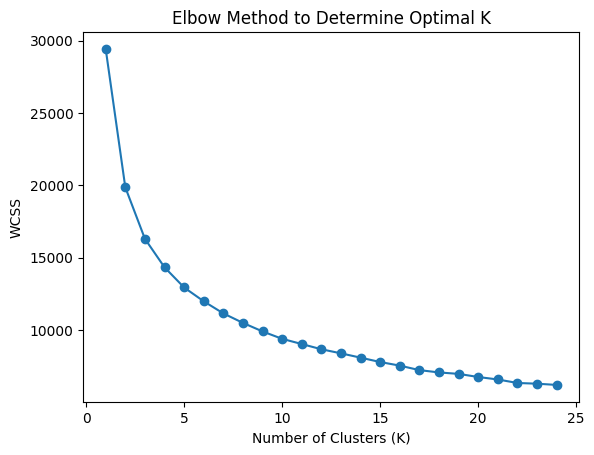

In [28]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 25):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=23, n_init=50)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 25), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=10, random_state=23, n_init=50)
# kmeans = KMeans(n_clusters=6, random_state=23, n_init=50)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [30]:
print(df.groupby('cluster').mean())

                 ID         G        GS   All_Star        MP        FG  \
cluster                                                                  
0        399.000000  1.767311  2.554405   1.064027  1.983686  1.900049   
1        443.672131 -0.809388 -0.842358  -0.271182 -0.772886 -0.690752   
2        378.000000  2.421664  3.757880   4.772941  2.957751  3.538053   
3        438.204545  0.105499 -0.049634  -0.234767 -0.061147 -0.079321   
4        417.210000  0.556253  0.417989  -0.223114  0.504419  0.357634   
5        390.461538 -0.988623 -0.865500  -0.271182 -0.844304 -0.737312   
6        388.000000  4.313248  6.725254  10.410491  5.663182  7.546961   
7        481.576159 -0.348138 -0.590704  -0.271182 -0.414827 -0.440284   
8        430.705882  1.823541  2.442247   0.639902  1.706839  1.545955   
9        359.000000  0.220625  0.789047   1.102176  0.453877  0.798515   

              FGA        2P       2PA        3P  ...      2PPG     2PAPG  \
cluster                            

C:\Users\Blair\AppData\Local\Temp\ipykernel_2608\3422288698.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('cluster').mean())


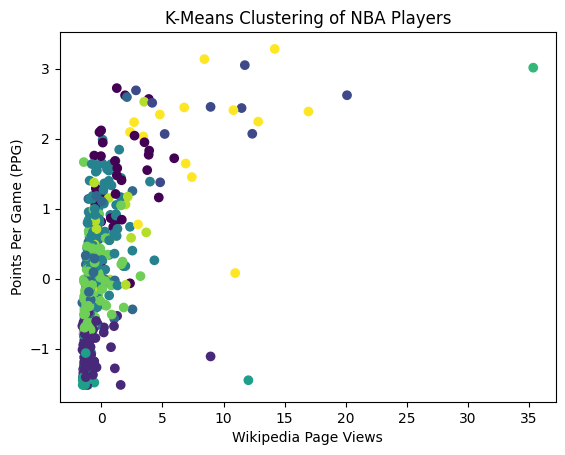

In [31]:
plt.scatter(df['Pageviews'], df['PPG'], c=df['cluster'], cmap='viridis')
plt.xlabel('Wikipedia Page Views')
plt.ylabel('Points Per Game (PPG)')
plt.title('K-Means Clustering of NBA Players')
plt.show()


In [32]:
for cluster in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster][['Player', 'Pageviews']].head(10))  # Show top 10 players per cluster



Cluster 0:
                       Player  Pageviews
24            Harrison Barnes  -0.021100
30              Nicolas Batum  -0.080514
31               Bradley Beal  -0.025136
43               Devin Booker   3.875461
61               Jimmy Butler   3.748367
64   Kentavious Caldwell-Pope  -0.045895
91                Mike Conley   0.765004
108             DeMar DeRozan   2.707841
143              De'Aaron Fox  -0.161485
152               Paul George   3.524236

Cluster 1:
                    Player  Pageviews
12  Thanasis Antetokounmpo   8.940590
23         Dominick Barlow  -1.403190
27          Charles Bassey  -1.393195
29          Jamison Battle  -1.287922
33        MarJon Beauchamp  -1.125490
34           Reece Beekman  -1.368532
41                 Bol Bol   1.285035
42               Adem Bona  -1.137480
55              Kobe Brown  -1.375523
58             Kobe Bufkin  -1.296956

Cluster 2:
                    Player  Pageviews
11   Giannis Antetokounmpo   8.940590
100          Stephe

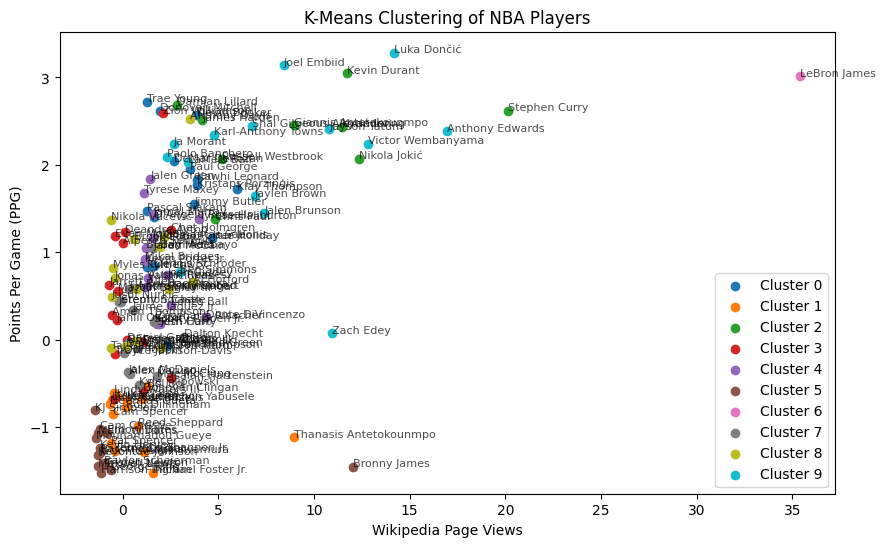

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot
for cluster in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == cluster].tail(15)
    plt.scatter(subset['Pageviews'], subset['PPG'], label=f'Cluster {cluster}')

    # Annotate player names
    for _, row in subset.iterrows():
        plt.annotate(row['Player'], (row['Pageviews'], row['PPG']), fontsize=8, alpha=0.7)

# # Annotate player names
# for _, row in df.iterrows():
#     plt.annotate(row['Player'], (row['Pageviews'], row['PTS']), fontsize=8, alpha=0.7)


plt.xlabel("Wikipedia Page Views")
plt.ylabel("Points Per Game (PPG)")
plt.title("K-Means Clustering of NBA Players")
plt.legend()
plt.show()


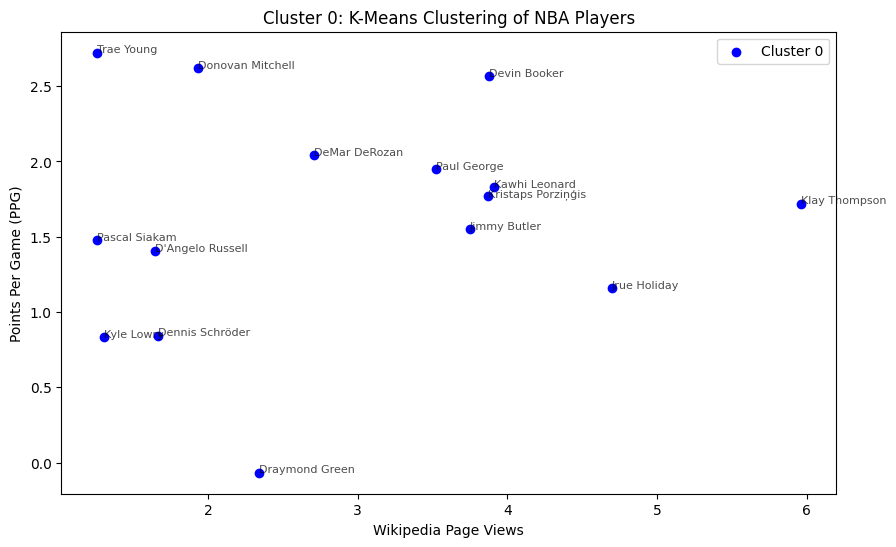

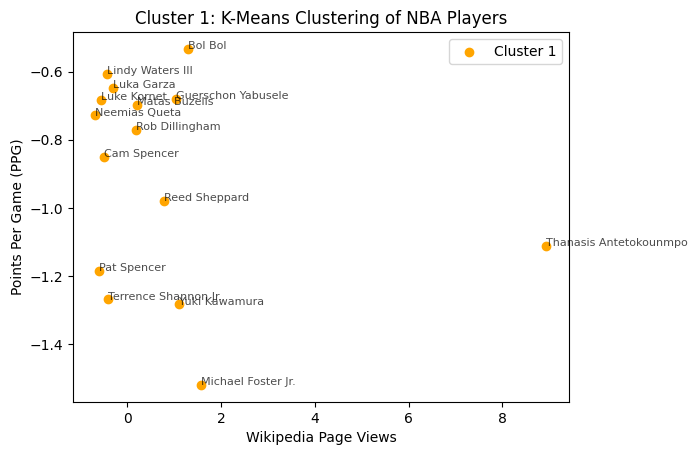

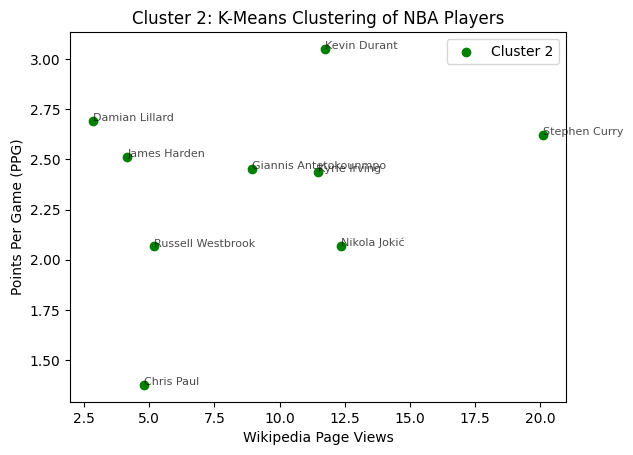

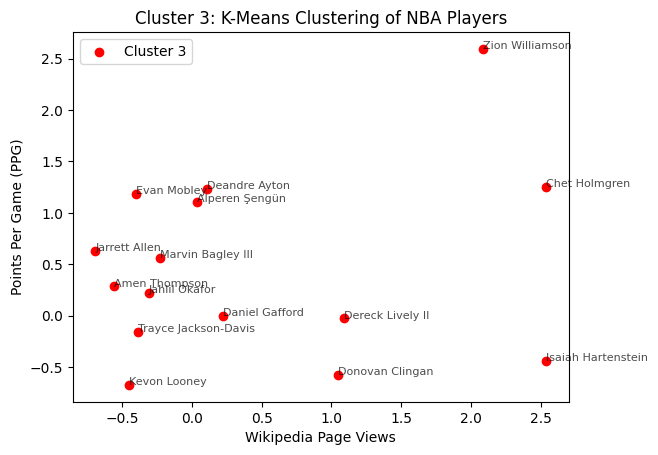

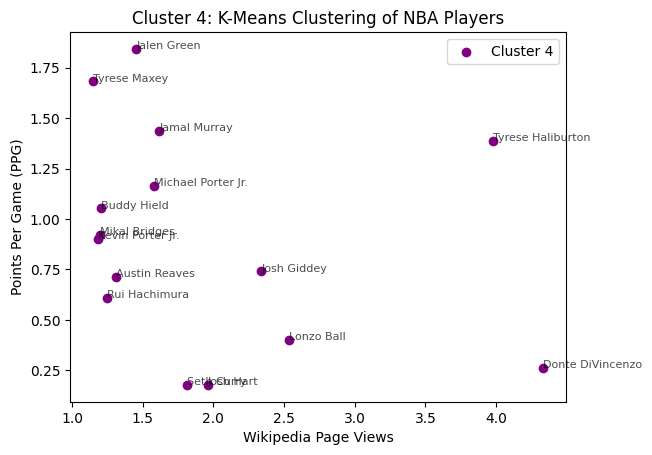

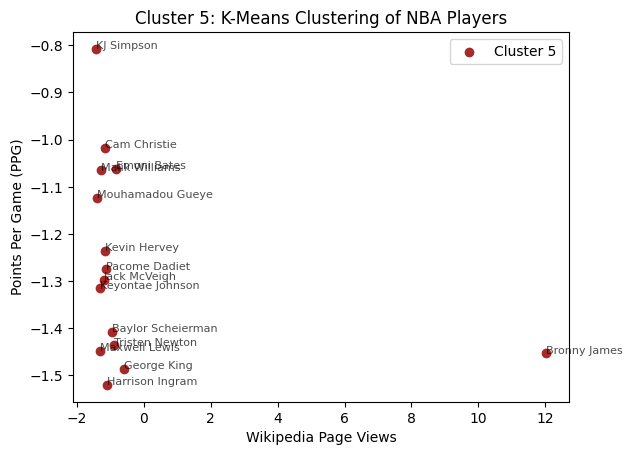

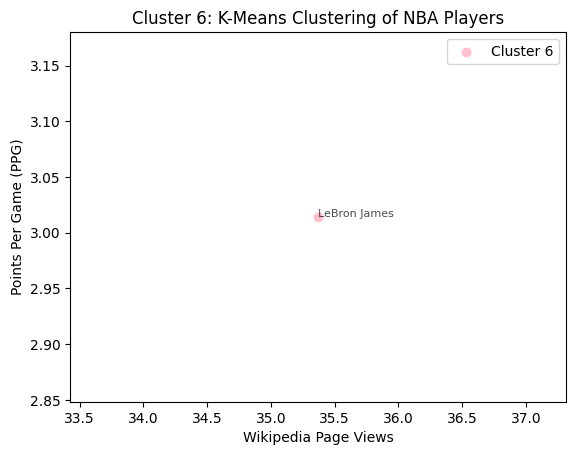

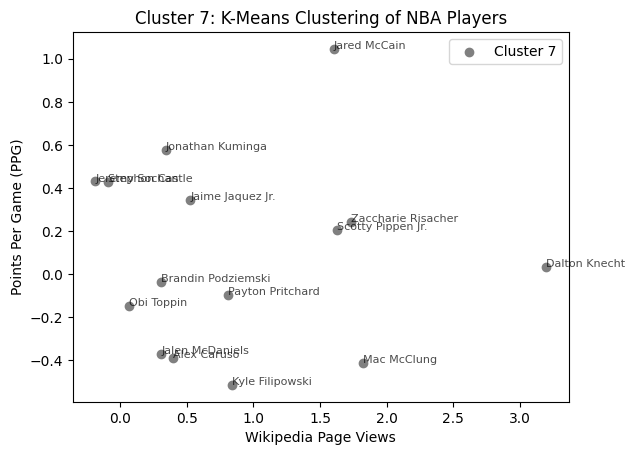

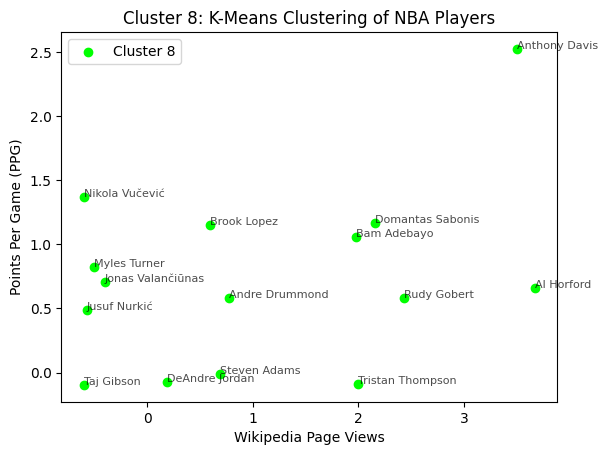

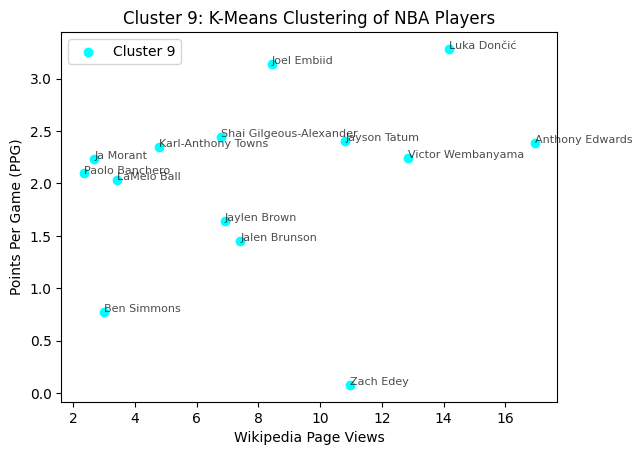

In [ ]:
plt.figure(figsize=(10, 6))

color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "lime",
    "cyan"
]

for cluster_num in range(10):

    subset = df[df['cluster'] == cluster_num].tail(15)

    plt.scatter(subset['Pageviews'], subset['PPG'], label=f"Cluster {cluster_num}", color=color_list[cluster_num])

    for _, row in subset.iterrows():
        plt.annotate(row['Player'], (row['Pageviews'], row['PPG']), fontsize=8, alpha=0.7)

    plt.xlabel("Wikipedia Page Views")
    plt.ylabel("Points Per Game (PPG)")
    plt.title(f"Cluster {cluster_num}: K-Means Clustering of NBA Players")
    plt.legend()
    plt.show()


In [ ]:
# Find the average stats per cluster (fix this after normalization)
cluster_means = df.groupby('cluster')[['PPG', 'APG', 'RPG', 'Pageviews']].median()
print(cluster_means)


              PPG       APG       RPG  Pageviews
cluster                                         
0        1.512630  1.135227  0.284675   1.206426
1       -0.953531 -0.816920 -0.869451  -1.284038
2        2.453878  2.831486  0.834405   8.940590
3       -0.030105 -0.377506  1.234930  -0.898618
4        0.666489  0.405608  0.080187  -0.367290
5       -1.406226 -1.047574 -1.198536  -1.311963
6        3.014170  3.235312  1.647326  35.369037
7       -0.246943 -0.252650 -0.277926  -1.032428
8        0.585302 -0.316996  2.279521   0.593030
9        2.239659  1.424354  1.483978   7.154250


In [36]:
from scipy.spatial.distance import euclidean

# Find the centroid of the most "popular" cluster (highest Pageviews)
superstar_cluster = cluster_means['Pageviews'].idxmax()
superstar_centroid = cluster_means.loc[superstar_cluster].values

# Compute distance of each player from the superstar cluster
df['Obscurity_Score'] = df.apply(
    lambda row: euclidean(
        row[['PPG', 'APG', 'RPG', 'Pageviews']].values,
        superstar_centroid
    ), axis=1
)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
df['Obscurity_Score'] = scaler.fit_transform(df[['Obscurity_Score']])

# Higher score = More obscure player
df = df.sort_values(by='Obscurity_Score', ascending=False)


In [61]:
print(df[['Player', 'Pageviews', 'PPG', 'Obscurity_Score']].tail(25))


                      Player  Pageviews       PPG  Obscurity_Score
173        Tyrese Haliburton   3.977548  1.385337        83.778642
114         Donte DiVincenzo   4.335712  0.260983        83.292168
176             James Harden   4.159151  2.511942        83.080669
195             Jrue Holiday   4.697109  1.158864        81.867543
458       Karl-Anthony Towns   4.784481  2.344750        81.775169
357               Chris Paul   4.812042  1.375791        81.551172
492        Russell Westbrook   5.179659  2.066684        80.373602
451            Klay Thompson   5.960752  1.719449        78.872782
54              Jaylen Brown   6.903041  1.644415        76.257883
155  Shai Gilgeous-Alexander   6.779670  2.445627        76.244053
56             Jalen Brunson   7.405458  1.450501        74.787185
12    Thanasis Antetokounmpo   8.940590 -1.112880        72.314897
132              Joel Embiid   8.433311  3.136332        72.035896
11     Giannis Antetokounmpo   8.940590  2.453878        70.49

In [62]:
print(df[['Player', 'Pageviews', 'PPG', 'Obscurity_Score']].head(25))

                 Player  Pageviews       PPG  Obscurity_Score
224      Daniss Jenkins  -1.535591 -1.520138       100.000000
243       Spencer Jones  -1.534877 -1.453080        99.919336
107         RayJ Dennis  -1.507774 -1.408375        99.891860
96      Isaiah Crawford  -1.514312 -1.408375        99.815813
292       Jaylen Martin  -1.481312 -1.352493        99.805283
120          Alex Ducas  -1.495075 -1.296612        99.770964
48        Jalen Bridges  -1.444280 -1.478227        99.676820
321         Riley Minix  -1.477090 -1.520138        99.674037
394        Liam Robbins  -1.462172 -1.404077        99.656360
138        Adam Flagler  -1.448824 -1.331538        99.619684
178     Elijah Harkless  -1.552676 -1.017204        99.568200
240         Isaac Jones  -1.474400 -0.941001        99.504374
78         Max Christie  -1.564493 -0.677352        99.490221
5        Trey Alexander  -1.394015 -1.376443        99.478719
466       Stanley Umude  -1.476592 -0.954337        99.472741
236     

In [39]:
df.to_csv("players_with_obscurity_scores.csv", index=False)

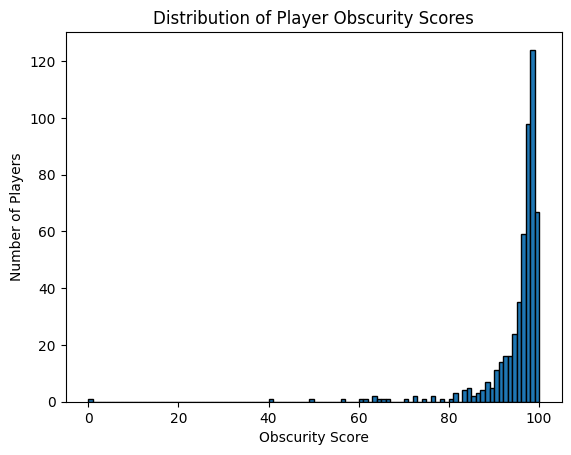

In [64]:
import matplotlib.pyplot as plt

plt.hist(df['Obscurity_Score'], bins=100, edgecolor='black')
plt.xlabel("Obscurity Score")
plt.ylabel("Number of Players")
plt.title("Distribution of Player Obscurity Scores")
plt.show()
